# Step 1: Loading Data and Displaying as DataFrame

In [1]:
import pandas as pd

# Load the UK Road Safety: Traffic Accidents dataset 'https://data.gov.uk/dataset/cb7ae6f0-4be6-4935-9277-47e5ce24a11f/road-safety-data/download'
data = pd.read_csv("C:/Users/Rajeswari Sohith/Documents/MLDM/Task 2/accidents.csv", nrows=10000)

# Display data as a dataframe
print("DataFrame Information:")
print(data.info())

# EDA - Display first few rows of the dataset
print("\nFirst few rows of the dataset:")
print(data.head())

DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6515 entries, 0 to 6514
Data columns (total 32 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Accident_Index                               6515 non-null   object 
 1   Location_Easting_OSGR                        6514 non-null   float64
 2   Location_Northing_OSGR                       6514 non-null   float64
 3   Longitude                                    6514 non-null   float64
 4   Latitude                                     6514 non-null   float64
 5   Police_Force                                 6515 non-null   int64  
 6   Accident_Severity                            6515 non-null   int64  
 7   Number_of_Vehicles                           6515 non-null   int64  
 8   Number_of_Casualties                         6515 non-null   int64  
 9   Date                                         6515 n

In [2]:
null_values = data.isnull().sum()
print("Null Values in the Dataset:")
print(null_values)

Null Values in the Dataset:
Accident_Index                                  0
Location_Easting_OSGR                           1
Location_Northing_OSGR                          1
Longitude                                       1
Latitude                                        1
Police_Force                                    0
Accident_Severity                               0
Number_of_Vehicles                              0
Number_of_Casualties                            0
Date                                            0
Day_of_Week                                     0
Time                                            0
Local_Authority_(District)                      0
Local_Authority_(Highway)                       0
1st_Road_Class                                  0
1st_Road_Number                                 0
Road_Type                                       0
Speed_limit                                     0
Junction_Detail                                 0
Junction_Control      

In [3]:
print(data.columns)

Index(['Accident_Index', 'Location_Easting_OSGR ', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'LSOA_of_Accident_Location'],
      dtype='object')


In [4]:
# Fill missing values for numerical columns with mean
numerical_columns = ['Location_Easting_OSGR ','Location_Northing_OSGR','Longitude', 'Latitude']
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Fill missing values for 'LSOA_of_Accident_Location' column with 'Unknown'
data['LSOA_of_Accident_Location'].fillna('Unknown', inplace=True)

# Check if there are any remaining null values
remaining_null_values = data.isnull().sum()
print("Remaining Null Values in the Dataset:")
print(remaining_null_values)

Remaining Null Values in the Dataset:
Accident_Index                                 0
Location_Easting_OSGR                          0
Location_Northing_OSGR                         0
Longitude                                      0
Latitude                                       0
Police_Force                                   0
Accident_Severity                              0
Number_of_Vehicles                             0
Number_of_Casualties                           0
Date                                           0
Day_of_Week                                    0
Time                                           0
Local_Authority_(District)                     0
Local_Authority_(Highway)                      0
1st_Road_Class                                 0
1st_Road_Number                                0
Road_Type                                      0
Speed_limit                                    0
Junction_Detail                                0
Junction_Control               

# Data Preprocessing

In [5]:
from sklearn.preprocessing import StandardScaler

# Data Preprocessing
# Selecting relevant columns for clustering
X = data[['Longitude', 'Latitude']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Applying Clustering Algorithms 

In [6]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN

# Applying Clustering Algorithms
kmeans = KMeans(n_clusters=5, random_state=42,n_init=10)
agg = AgglomerativeClustering(n_clusters=5)

# Fit the models
kmeans_clusters = kmeans.fit_predict(X_scaled)
agg_clusters = agg.fit_predict(X_scaled)

# Evaluating Clustering Results

In [7]:
from sklearn.metrics import silhouette_score

# Evaluating Clustering Results
kmeans_score = silhouette_score(X_scaled, kmeans_clusters)
agg_score = silhouette_score(X_scaled, agg_clusters)

print("\nClustering Results:")
print(f"KMeans Silhouette Score: {kmeans_score}")
print(f"Agglomerative Clustering Silhouette Score: {agg_score}")


Clustering Results:
KMeans Silhouette Score: 0.4222038527933648
Agglomerative Clustering Silhouette Score: 0.39803296317688697


# Visualizing Clusters

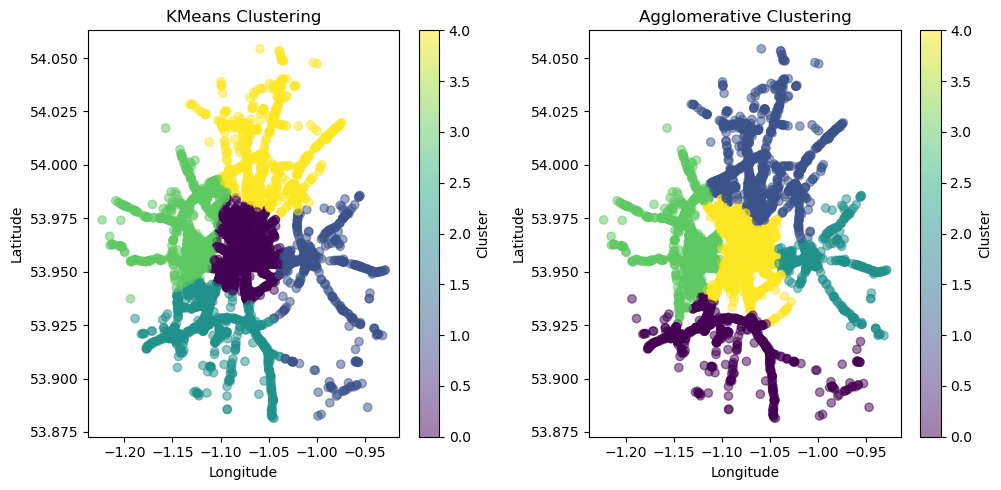

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 5))

# KMeans Clustering Plot
plt.subplot(131)
plt.scatter(data['Longitude'], data['Latitude'], c=kmeans.labels_, cmap='viridis', alpha=0.5)
plt.title('KMeans Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')

# Agglomerative Clustering Plot
plt.subplot(132)
plt.scatter(data['Longitude'], data['Latitude'], c=agg.labels_, cmap='viridis', alpha=0.5)
plt.title('Agglomerative Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.colorbar(label='Cluster')


plt.tight_layout()
plt.show()



In [9]:
print("\nConclusion:")
if kmeans_score > agg_score:
    print("The clustering results indicate that KMeans Clustering is prefferable for this dataset ")
else:
    print("The clustering results indicate that Agglomerative Clustering is prefferable for this dataset ")


Conclusion:
The clustering results indicate that KMeans Clustering is prefferable for this dataset 
